In [243]:
import random

import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [244]:
from nexa_preprocessing.utils.time_series_operations import slice_by
from py_sentimotion_mapper.sentimotion_mapper import Mapper
from coding_interpreter.metadata import Metadata

In [245]:
Mapper._load_data_if_needed()

In [246]:
df = pd.read_csv("data/completed_export.csv")
df

,filename,alias,emotion_id,valence,set_number,video_id,emotion_id_reply,emotion_options,randomization_id,processed_status
0,A102_emb_p_2,0010541301574d33a41c542299f184a6,39,neg,0,A102,40,"['40', '43', '14', '10', '39', '22', '32', '6'...",161,1
1,A102_fea_p_2,0010541301574d33a41c542299f184a6,10,neg,0,A102,32,"['40', '43', '14', '10', '39', '22', '32', '6'...",161,1
2,A102_rej_p_3,0010541301574d33a41c542299f184a6,14,neg,0,A102,14,"['40', '43', '14', '10', '39', '22', '32', '6'...",161,1
3,A102_sad_p_3,0010541301574d33a41c542299f184a6,6,neg,0,A102,43,"['40', '43', '14', '10', '39', '22', '32', '6'...",161,1
4,A102_sha_v_2,0010541301574d33a41c542299f184a6,43,neg,0,A102,39,"['40', '43', '14', '10', '39', '22', '32', '6'...",161,1
...,...,...,...,...,...,...,...,...,...,...
36295,A72_rej_p_3,ff807190c01845fa827a02d5e23ed14c,14,neg,0,A72,1,"['34', '14', '39', '11', '12', '43', '37', '3'...",127,1
36296,A91_anx_p_3,ff807190c01845fa827a02d5e23ed14c,34,neg,0,A91,3,"['34', '14', '39', '11', '12', '43', '37', '3'...",127,1
36297,A91_conf_p_3,ff807190c01845fa827a02d5e23ed14c,1,neg,0,A91,3,"['34', '14', '39', '11', '12', '43', '37', '3'...",127,1
36298,A91_disa_v_3,ff807190c01845fa827a02d5e23ed14c,37,neg,0,A91,34,"['34', '14', '39', '11', '12', '43', '37', '3'...",127,1


In [247]:
# Specify the path to your JSON file
meta_file_path = "data/meta.json"

# Open and read the JSON file
with open(meta_file_path, 'r') as json_file:
    # Load the JSON data into a Python dictionary
    data_dict = json.load(json_file)

In [248]:
for index, row in df.iterrows():
    alias = row['alias']
    if alias in data_dict:
        json_entry = data_dict[alias]
        for key, value in json_entry.items():
            df.at[index, key] = value

/tmp/ipykernel_10717/255872742.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'vs87' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.at[index, key] = value
/tmp/ipykernel_10717/255872742.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'neg' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.at[index, key] = value
/tmp/ipykernel_10717/255872742.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'm' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.at[index, key] = value


In [249]:
df.rename(columns={"ID": "subject_id"}, inplace=True)

In [250]:
# Add a new column 'accurate' that indicates whether the answer is accurate
df['accurate'] = df['emotion_id'] == df['emotion_id_reply']

In [251]:
# df = df[df['subject_id'].notna()]
# df['subject_id'] = df['subject_id'].astype(str)
# # Remove the 'vs' prefix and convert to numeric values
# df['subject_id'] = df['subject_id'].str.replace('vs', '', regex=False).astype(int)

In [252]:
df

,filename,alias,emotion_id,valence,set_number,video_id,emotion_id_reply,emotion_options,randomization_id,processed_status,subject_id,valens,set,rand id,sex,kontakt igen,födelseår,accurate
0,A102_emb_p_2,0010541301574d33a41c542299f184a6,39,neg,0,A102,40,"['40', '43', '14', '10', '39', '22', '32', '6'...",161,1,vs87,neg,0.0,161.0,m,0.0,1977.0,False
1,A102_fea_p_2,0010541301574d33a41c542299f184a6,10,neg,0,A102,32,"['40', '43', '14', '10', '39', '22', '32', '6'...",161,1,vs87,neg,0.0,161.0,m,0.0,1977.0,False
2,A102_rej_p_3,0010541301574d33a41c542299f184a6,14,neg,0,A102,14,"['40', '43', '14', '10', '39', '22', '32', '6'...",161,1,vs87,neg,0.0,161.0,m,0.0,1977.0,True
3,A102_sad_p_3,0010541301574d33a41c542299f184a6,6,neg,0,A102,43,"['40', '43', '14', '10', '39', '22', '32', '6'...",161,1,vs87,neg,0.0,161.0,m,0.0,1977.0,False
4,A102_sha_v_2,0010541301574d33a41c542299f184a6,43,neg,0,A102,39,"['40', '43', '14', '10', '39', '22', '32', '6'...",161,1,vs87,neg,0.0,161.0,m,0.0,1977.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36295,A72_rej_p_3,ff807190c01845fa827a02d5e23ed14c,14,neg,0,A72,1,"['34', '14', '39', '11', '12', '43', '37', '3'...",127,1,vs109,neg,0.0,127.0,m,1.0,1990.0,False
36296,A91_anx_p_3,ff807190c01845fa827a02d5e23ed14c,34,neg,0,A91,3,"['34', '14', '39', '11', '12', '43', '37', '3'...",127,1,vs109,neg,0.0,127.0,m,1.0,1990.0,False
36297,A91_conf_p_3,ff807190c01845fa827a02d5e23ed14c,1,neg,0,A91,3,"['34', '14', '39', '11', '12', '43', '37', '3'...",127,1,vs109,neg,0.0,127.0,m,1.0,1990.0,False
36298,A91_disa_v_3,ff807190c01845fa827a02d5e23ed14c,37,neg,0,A91,34,"['34', '14', '39', '11', '12', '43', '37', '3'...",127,1,vs109,neg,0.0,127.0,m,1.0,1990.0,False


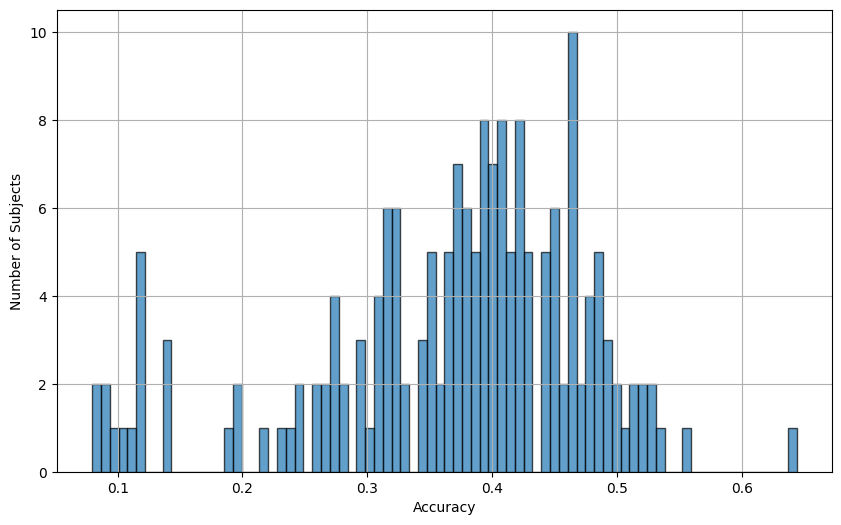

In [273]:
# Group the DataFrame by 'emotion_id' and calculate the accuracy for each ID
accuracy_by_subject = df.groupby('subject_id')['accurate'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.hist(accuracy_by_subject.accurate.values, bins=80, edgecolor='k', alpha=0.7)
plt.xlabel("Accuracy")
plt.ylabel("Number of Subjects")
plt.grid(True)
plt.show()

In [269]:
low_performance_subjects = accuracy_by_subject[accuracy_by_subject['accurate'] < 0.15]

In [270]:
low_performance_subjects

,subject_id,accurate
11,vs101,0.090909
33,vs121,0.117424
75,vs162,0.083333
89,vs176,0.136364
108,vs27,0.109848
125,vs45,0.117424
141,vs62,0.121212
142,vs63,0.121212
145,vs66,0.106061
152,vs74,0.090909


In [275]:
accuracy_by_subject.to_csv("data/accuracy_by_subject.csv")